In [2]:
import pandas as pd 
import re
import nltk 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np 
#train models 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sn
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [3]:
# Setting up stats dataframe
import time
stats = pd.DataFrame(columns=['Algorithm','Label','Accurary','Precision','Recall','F1','Time'])

# Get the data

In [4]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
train.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


# Cleaning data

## Preprocessing words

In [6]:
def normalize(df): 
    corpus = []
    ps = PorterStemmer()
    df_size = len(df) 
    for i in range(0,df_size):
        # get review and remove non alpha chars
        article = re.sub('[^a-zA-Z]', ' ', df['ABSTRACT'][i])
        # to lower-case and tokenize
        article = article.lower().split()
        # stemming and stop word removal
        article = ' '.join([ps.stem(w) for w in article if not w in set(stopwords.words('english'))])
        corpus.append(article)
    return corpus

# To avoid making this cleaning every time, we save teh output as a csv
def save_csv(corpus_train, file_name): 
    df = pd.DataFrame({'text': corpus_train})
    df.to_csv(file_name) 
    
train['ABSTRACT'] = train['TITLE'] +train['ABSTRACT']
corpus_train = normalize(train)
save_csv(corpus_train, 'preprocessed_train.csv')

test['ABSTRACT'] = test['TITLE'] + test['ABSTRACT']
corpus_test = normalize(test)
save_csv(corpus_test, 'preprocessed_test.csv')


NameError: name 'train' is not defined

# Split input and output

In [6]:
def get_input(preprocessed, x_col_name): 
    vectorizer = CountVectorizer(max_features = 1500)

    X_array = preprocessed.loc[:,x_col_name]
    X = vectorizer.fit_transform(X_array).toarray()
    return X

def get_outputs(df, y_cols_name):
    y = []
    for col_name in y_cols_name: 
        col_values = df.loc[:,col_name].values
        y.append(col_values)
    return y


preprocessed = pd.read_csv('preprocessed_train.csv')
preprocessed_submission = pd.read_csv('preprocessed_test.csv')
y_columns = train.columns[3:]
X = get_input(preprocessed, 'text')
y = get_outputs(train, y_columns)
X_submission = get_input(preprocessed_submission, 'text')

# Split train and test sets

In [7]:
y_train_test = []
for i in range(len(y_columns)): 
    X_train, X_test, y_train, y_test = train_test_split(X, y[i], test_size = 0.20, random_state = 0)
    y_train_test.append([y_train, y_test])

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_columns)

(16777, 1500) (16777,)
(4195, 1500) (4195,)
Index(['Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')


# Train the model and generate results

In [8]:
def print_statistics(y_test, y_pred, column_name): 
   # print(confusion_matrix(y_test, y_pred))
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred))
    print('Recall: ', recall_score(y_test, y_pred))
    print('F1: ', f1_score(y_test, y_pred))
    print()
    
def get_statistics(y_test, y_pred, column_name): 
    return [accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred)]

# Statistics over NBGaussian

In [11]:
def prepare_statistic(df):
    x = ['Accuracy', 'Precision', 'Recall', 'F1'] 
    title = df.iloc[1]
    y = df.iloc[2:].tolist()
    return x, y, title


def plot_statistics(stats): 
    fig, axs = plt.subplots(2, 3, sharex=True, sharey=True) 
    fig.set_figwidth(20)
    fig.set_figheight(7)
    for i in range(2): 
        for j in range(3): 
            index = i*3 + j 
            df = stats[index]
            x, y, title = prepare_statistic(df) 
            axs[i,j].bar(x,y)
            axs[i,j].set_title(title)
    plt.show()
            
def plot_time(arr, title):
    x = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantative Biology', 'Quantitative Finance']
    y = arr 
    fig = plt.figure()
    fig.set_figwidth(15)
    fig.set_figheight(5)
    plt.bar(x,y)
    plt.title(title)
    plt.show()
    
times = {}

LABEL ::  Computer Science
Accuracy:  0.769249106078665
Precision:  0.6594083812654067
Recall:  0.9202981651376146
F1:  0.7683101962661559

LABEL ::  Physics
Accuracy:  0.8982121573301549
Precision:  0.8029944838455477
Recall:  0.8520066889632107
F1:  0.8267748478701827

LABEL ::  Mathematics
Accuracy:  0.8011918951132301
Precision:  0.5714285714285714
Recall:  0.8967441860465116
F1:  0.6980448950036205

LABEL ::  Statistics
Accuracy:  0.6598331346841478
Precision:  0.4120999561595791
Recall:  0.9161793372319688
F1:  0.5684910795282734

LABEL ::  Quantitative Biology
Accuracy:  0.6474374255065555
Precision:  0.054866100587851074
Recall:  0.7241379310344828
F1:  0.10200364298724954

LABEL ::  Quantitative Finance
Accuracy:  0.899880810488677
Precision:  0.05952380952380952
Recall:  0.5
F1:  0.10638297872340424



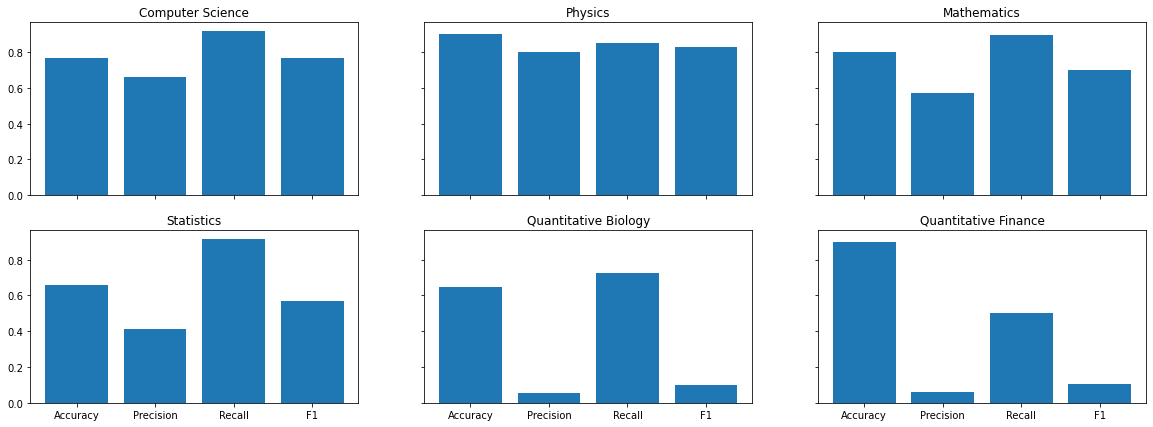

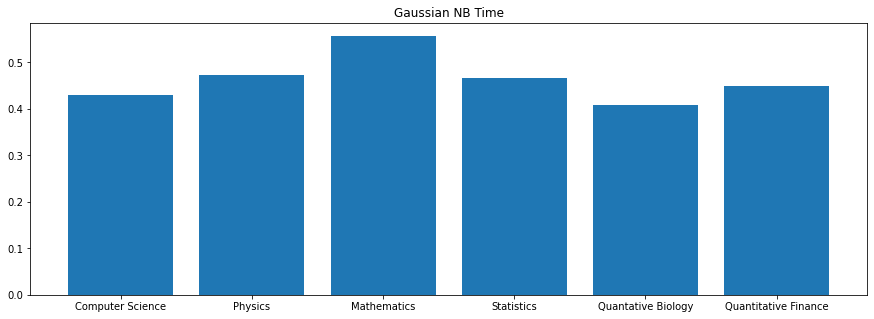

In [12]:
classifier = GaussianNB()
gaussian_df = pd.DataFrame()
gaussian_submission_df = pd.DataFrame() 
time_nb = []
stats_nb = []
for i in range(len(y_columns)): 
    col_name = y_columns[i]
    print("LABEL :: ", col_name)
    y_train = y_train_test[i][0]
    y_test = y_train_test[i][1]
    
    begin = time.time()
    classifier.fit(X_train, y_train)
    end = time.time()
    
    gaussian_df[col_name]= classifier.predict(X_test)
    gaussian_submission_df[col_name] = classifier.predict(X_submission)
    
    print_statistics(y_test, gaussian_df[col_name].values, col_name)
    stat_array = get_statistics(y_test, gaussian_df[col_name].values, col_name)
    stats_nb.append(pd.Series(['Naive Bayes',col_name,stat_array[0],stat_array[1],stat_array[2],stat_array[3]]))
    time_nb.append(end-begin) 


plot_statistics(stats_nb)
times['nb'] = time_nb
plot_time(time_nb, "Gaussian NB Time")


LABEL ::  Computer Science


C:\Users\julia\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy:  0.831704410011919
Precision:  0.8092967818831943
Recall:  0.7786697247706422
F1:  0.7936879018118062


LABEL ::  Physics


C:\Users\julia\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy:  0.9087008343265792
Precision:  0.8513396715643907
Recall:  0.8235785953177257
F1:  0.8372290692732682


LABEL ::  Mathematics


C:\Users\julia\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy:  0.8800953516090584
Precision:  0.7553571428571428
Recall:  0.7869767441860465
F1:  0.7708428246013667


LABEL ::  Statistics


C:\Users\julia\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy:  0.8579261025029797
Precision:  0.722567287784679
Recall:  0.6803118908382066
F1:  0.7008032128514056


LABEL ::  Quantitative Biology


C:\Users\julia\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy:  0.9492252681764005
Precision:  0.21965317919075145
Recall:  0.3275862068965517
F1:  0.2629757785467128


LABEL ::  Quantitative Finance
Accuracy:  0.9868891537544696
Precision:  0.4418604651162791
Recall:  0.38
F1:  0.40860215053763443




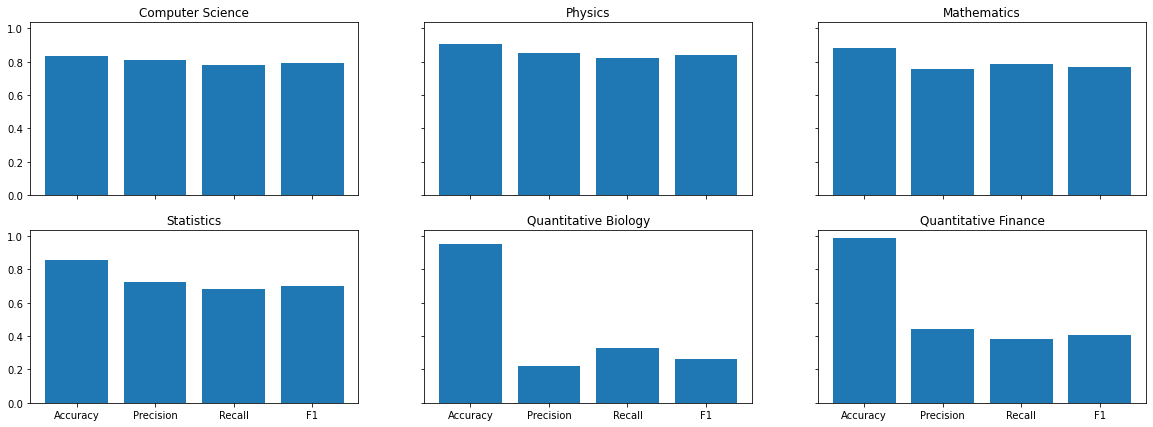

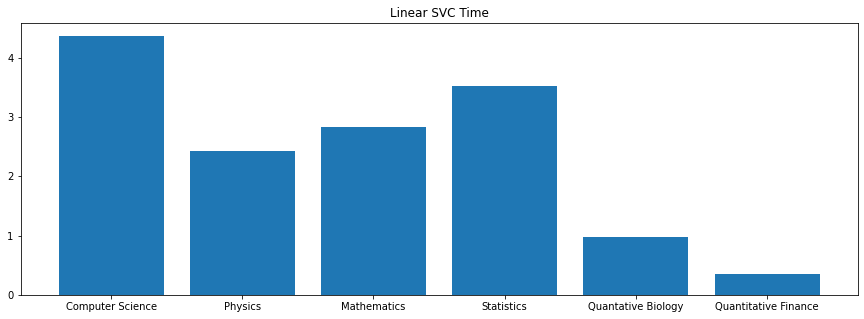

In [13]:
# SVM

from sklearn.svm import LinearSVC


classifier = LinearSVC()
gaussian_df = pd.DataFrame()
gaussian_submission_df = pd.DataFrame() 
time_svm = []
stats_svm = []
for i in range(len(y_columns)): 
    col_name = y_columns[i]
    print("LABEL :: ", col_name)
    y_train = y_train_test[i][0]
    y_test = y_train_test[i][1]
    
    begin = time.time()
    classifier.fit(X_train, y_train)
    end = time.time()
    gaussian_df[col_name]= classifier.predict(X_test)
    gaussian_submission_df[col_name] = classifier.predict(X_submission)
    print_statistics(y_test, gaussian_df[col_name].values, col_name)
    stat_array = get_statistics(y_test, gaussian_df[col_name].values, col_name)
    print()
    stats_svm.append(pd.Series(['Support Vector Machines',col_name,stat_array[0],stat_array[1],stat_array[2],stat_array[3]]))
    time_svm.append(end-begin)
    
plot_statistics(stats_svm)
times['svm'] = time_svm
plot_time(time_svm, "Linear SVC Time")

LABEL ::  Computer Science


C:\Users\julia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.8348033373063171
Precision:  0.8141063956963539
Recall:  0.7809633027522935
F1:  0.797190517998244


LABEL ::  Physics


C:\Users\julia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.9115613825983313
Precision:  0.8565254969749352
Recall:  0.8285953177257525
F1:  0.8423289417764556


LABEL ::  Mathematics


C:\Users\julia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.8815256257449344
Precision:  0.7594254937163375
Recall:  0.7869767441860465
F1:  0.7729556875285517


LABEL ::  Statistics


C:\Users\julia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.8588796185935638
Precision:  0.7269874476987448
Recall:  0.6773879142300195
F1:  0.7013118062563068


LABEL ::  Quantitative Biology


C:\Users\julia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.9623361144219309
Precision:  0.31896551724137934
Recall:  0.31896551724137934
F1:  0.31896551724137934


LABEL ::  Quantitative Finance
Accuracy:  0.9897497020262217
Precision:  0.6060606060606061
Recall:  0.4
F1:  0.4819277108433735




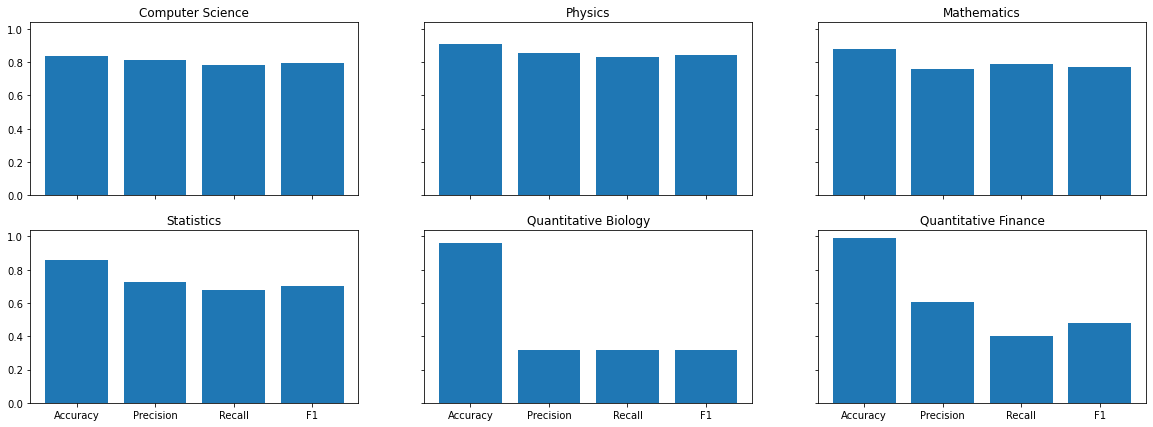

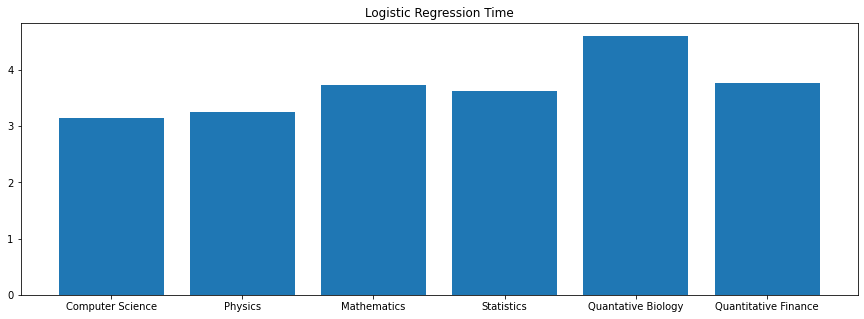

In [14]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
gaussian_df = pd.DataFrame()
gaussian_submission_df = pd.DataFrame() 

time_lr = []
stats_lr = []
for i in range(len(y_columns)): 
    col_name = y_columns[i]
    print("LABEL :: ", col_name)
    y_train = y_train_test[i][0]
    y_test = y_train_test[i][1]
    
    begin = time.time()
    classifier.fit(X_train, y_train)
    end = time.time()
    gaussian_df[col_name]= classifier.predict(X_test)
    gaussian_submission_df[col_name] = classifier.predict(X_submission)
    print_statistics(y_test, gaussian_df[col_name].values, col_name)
    stat_array = get_statistics(y_test, gaussian_df[col_name].values, col_name)
    print()
    stats_lr.append(pd.Series(['Logistic Regression',col_name,stat_array[0],stat_array[1],stat_array[2],stat_array[3]]))
    time_lr.append(end-begin)
    
plot_statistics(stats_lr)
times['lr'] = time_lr
plot_time(time_lr, "Logistic Regression Time")

LABEL ::  Computer Science
Accuracy:  0.8019070321811681
Precision:  0.7529085872576178
Recall:  0.779243119266055
F1:  0.7658495350803043


LABEL ::  Physics
Accuracy:  0.9072705601907032
Precision:  0.8524017467248908
Recall:  0.8160535117056856
F1:  0.8338316958564717


LABEL ::  Mathematics
Accuracy:  0.8791418355184744
Precision:  0.7736030828516378
Recall:  0.7469767441860465
F1:  0.7600567912920019


LABEL ::  Statistics
Accuracy:  0.8269368295589988
Precision:  0.6609442060085837
Recall:  0.6003898635477583
F1:  0.6292134831460674


LABEL ::  Quantitative Biology
Accuracy:  0.9511323003575686
Precision:  0.23353293413173654
Recall:  0.33620689655172414
F1:  0.2756183745583039


LABEL ::  Quantitative Finance
Accuracy:  0.9854588796185936
Precision:  0.39622641509433965
Recall:  0.42
F1:  0.4077669902912621




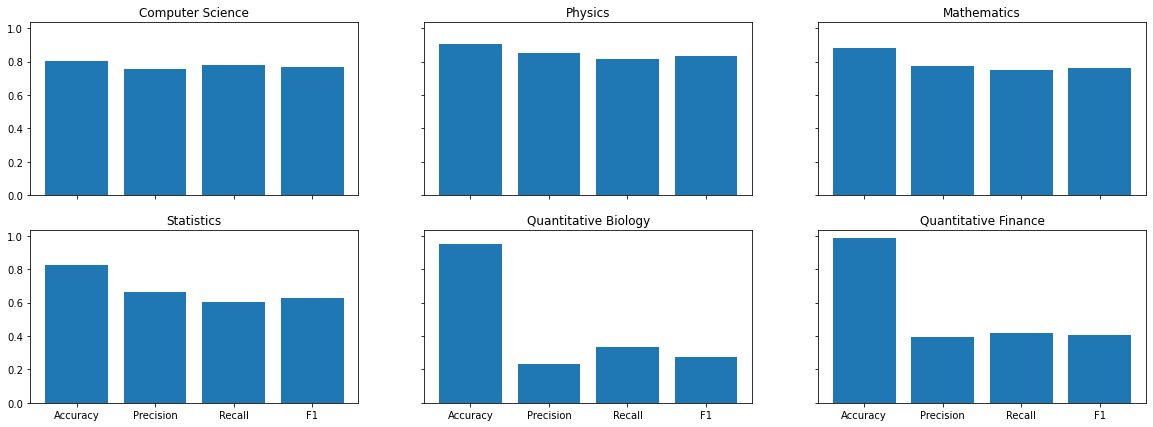

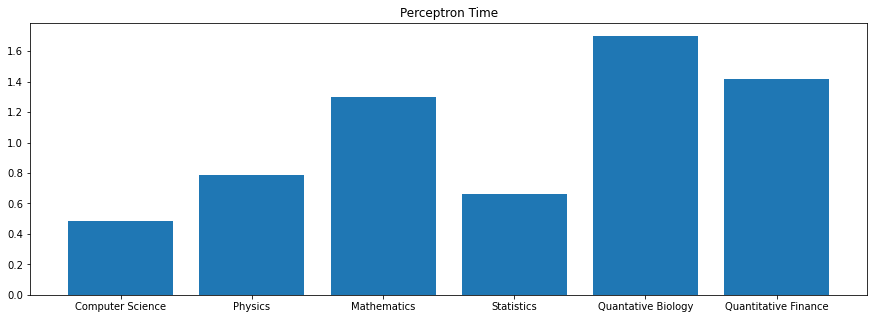

In [17]:
# Perceptron

from sklearn.linear_model import Perceptron

classifier = Perceptron()
gaussian_df = pd.DataFrame()
gaussian_submission_df = pd.DataFrame() 

stats_p = []
time_p = []
for i in range(len(y_columns)): 
    col_name = y_columns[i]
    print("LABEL :: ", col_name)
    y_train = y_train_test[i][0]
    y_test = y_train_test[i][1]
    
    begin = time.time()
    classifier.fit(X_train, y_train)
    end = time.time()
    gaussian_df[col_name]= classifier.predict(X_test)
    gaussian_submission_df[col_name] = classifier.predict(X_submission)
    print_statistics(y_test, gaussian_df[col_name].values, col_name)
    stat_array = get_statistics(y_test, gaussian_df[col_name].values, col_name)
    print()
    stats_p.append(pd.Series(['Perceptron',col_name,stat_array[0],stat_array[1],stat_array[2],stat_array[3]]))
    time_p.append(end-begin)


plot_statistics(stats_p)
times['p'] = time_p
plot_time(time_p, "Perceptron Time")

LABEL ::  Computer Science
Accuracy:  0.7625744934445768
Precision:  0.7142038946162658
Recall:  0.7150229357798165
F1:  0.7146131805157594


LABEL ::  Physics
Accuracy:  0.8607866507747318
Precision:  0.7602040816326531
Recall:  0.7474916387959866
F1:  0.7537942664418211


LABEL ::  Mathematics
Accuracy:  0.8269368295589988
Precision:  0.6587807097361238
Recall:  0.6734883720930233
F1:  0.6660533578656853


LABEL ::  Statistics
Accuracy:  0.8133492252681764
Precision:  0.6167146974063401
Recall:  0.6257309941520468
F1:  0.6211901306240929


LABEL ::  Quantitative Biology
Accuracy:  0.9609058402860549
Precision:  0.2692307692307692
Recall:  0.2413793103448276
F1:  0.2545454545454545


LABEL ::  Quantitative Finance
Accuracy:  0.9828367103694875
Precision:  0.2608695652173913
Recall:  0.24
F1:  0.24999999999999994




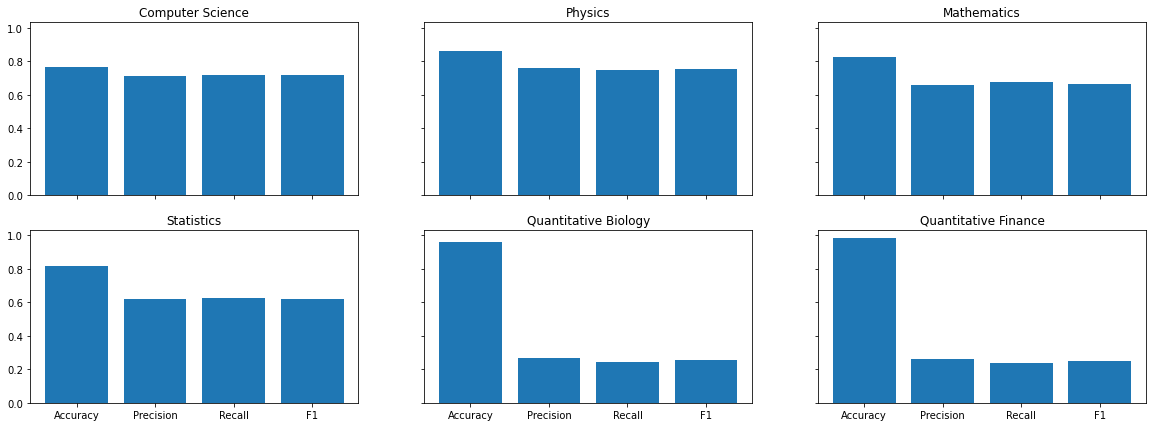

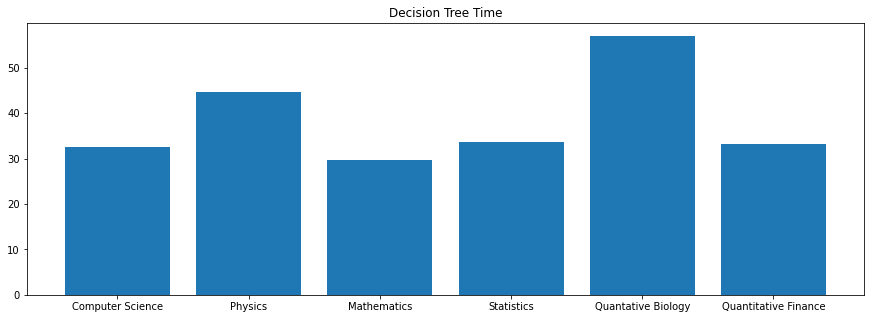

In [16]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
gaussian_df = pd.DataFrame()
gaussian_submission_df = pd.DataFrame()
stats_dt = []
time_dt = []
for i in range(len(y_columns)): 
    col_name = y_columns[i]
    print("LABEL :: ", col_name)
    y_train = y_train_test[i][0]
    y_test = y_train_test[i][1]
    
    begin = time.time()
    classifier.fit(X_train, y_train)
    end = time.time()
    gaussian_df[col_name]= classifier.predict(X_test)
    gaussian_submission_df[col_name] = classifier.predict(X_submission)
    print_statistics(y_test, gaussian_df[col_name].values, col_name)
    stat_array = get_statistics(y_test, gaussian_df[col_name].values, col_name)
    print()
    stats_dt.append(pd.Series(['Decision Tree',col_name,stat_array[0],stat_array[1],stat_array[2],stat_array[3]]))
    time_dt.append(end-begin)

plot_statistics(stats_dt)
times['dt'] = time_dt
plot_time(time_dt, "Decision Tree Time")

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
gaussian_df = pd.DataFrame()
gaussian_submission_df = pd.DataFrame() 
stats_rf = []
time_rf = []
for i in range(len(y_columns)): 
    col_name = y_columns[i]
    print("LABEL :: ", col_name)
    y_train = y_train_test[i][0]
    y_test = y_train_test[i][1]
    
    begin = time.time()
    classifier.fit(X_train, y_train)
    end = time.time()
    gaussian_df[col_name]= classifier.predict(X_test)
    gaussian_submission_df[col_name] = classifier.predict(X_submission)
    print_statistics(y_test, gaussian_df[col_name].values, col_name)
    stat_array = get_statistics(y_test, gaussian_df[col_name].values, col_name)
    print()
    stats_rf.append(pd.Series(['Random Forest',col_name,stat_array[0],stat_array[1],stat_array[2],stat_array[3]]))
    time_rf.append(end-begin)
    
plot_statistics(stats_rf)
times['rf'] = time_rf
plot_time(time_rf, "Random Forest Time")

LABEL ::  Computer Science
Accuracy:  0.8524433849821216
Precision:  0.7968337730870713
Recall:  0.8658256880733946
F1:  0.8298983237153065


LABEL ::  Physics
